# Perceptron Binary Classification - Wheat Seeds Dataset

### Import Libraries

In [1]:
# Numpy for efficient Matrix and mathematical operations.
import numpy as np

# Matplotlib for plotting visualizing graphs
import matplotlib
import matplotlib.pyplot as plt 

# To show all the generated plots inline in the notebook
%matplotlib inline

In [2]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

### Dataset analysis and visualisalisation

In [3]:
dataset = pd.read_csv('seeds-binary.csv')
dataset.head(140)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
129,15.56,14.89,0.8823,5.776,3.408,4.972,5.847,2
130,17.36,15.76,0.8785,6.145,3.574,3.526,5.971,2
131,15.57,15.15,0.8527,5.920,3.231,2.640,5.879,2
132,15.60,15.11,0.8580,5.832,3.286,2.725,5.752,2


In [4]:
dataset.shape

(134, 8)

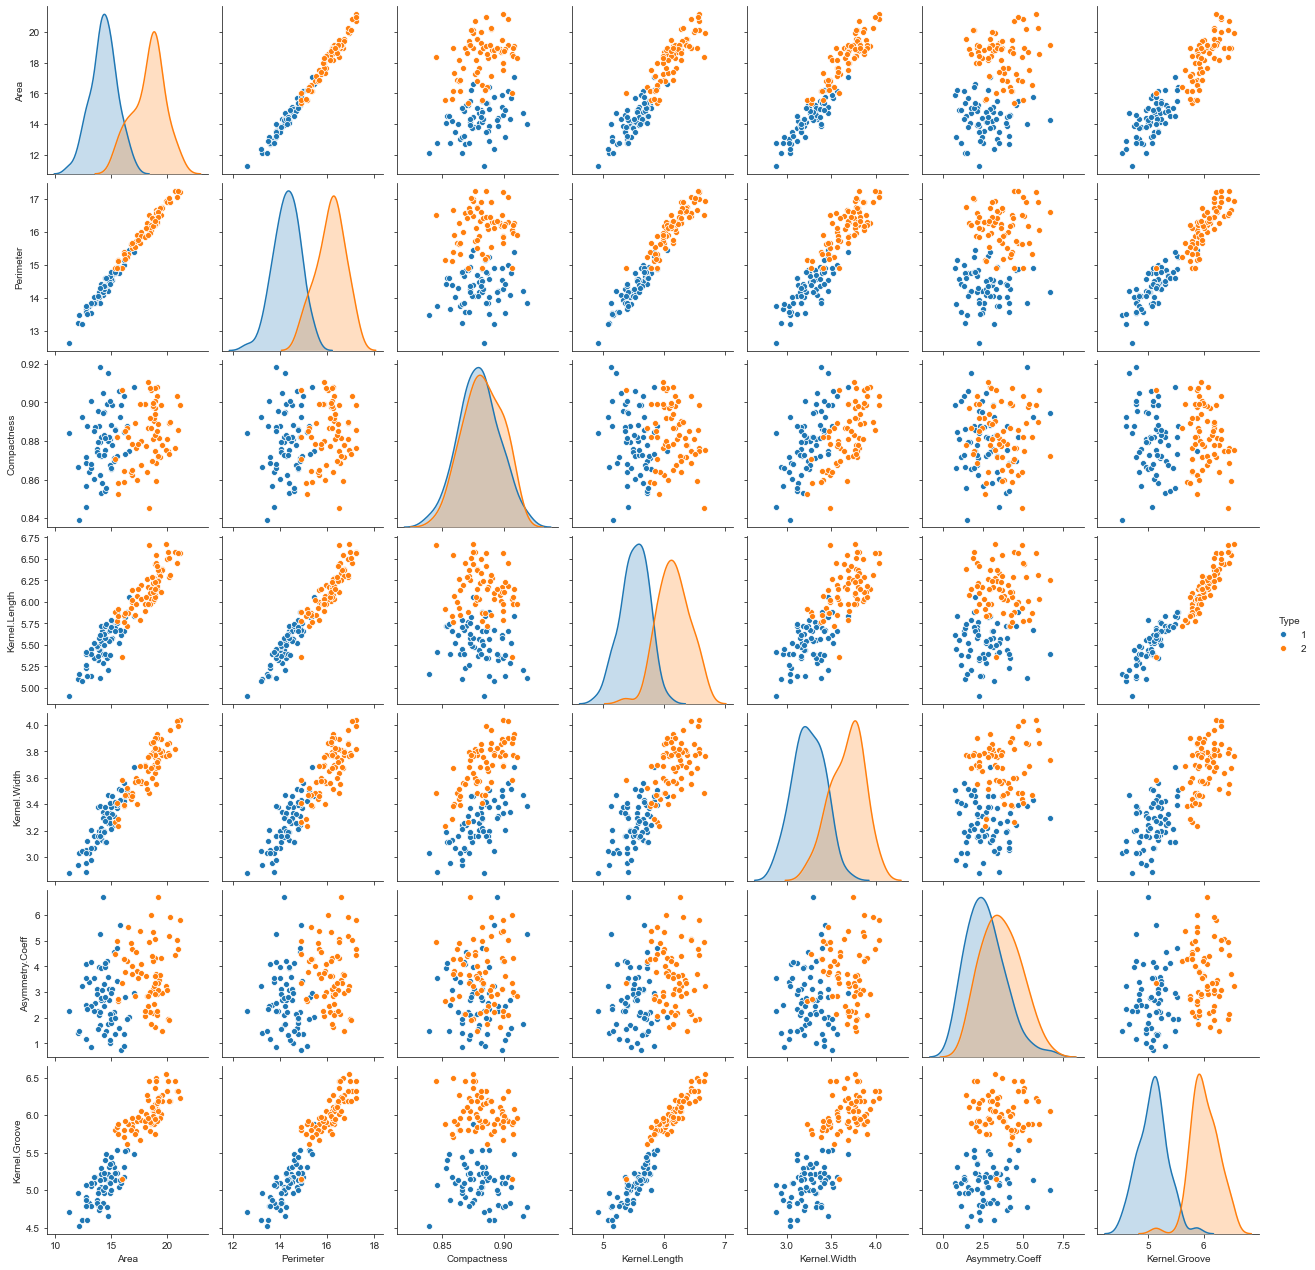

In [5]:
sns.set_style(style="ticks")
sns.pairplot(dataset, "Type")

### Preprocessing dataset for neural network training

In [6]:
shuffled_dataset = dataset.sample(frac=1).reset_index(drop=True)
shuffled_dataset['Type'] = shuffled_dataset['Type'] - 1

In [7]:
shuffled_dataset.head(140)

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.11,14.54,0.8986,5.579,3.462,3.128,5.180,0
1,18.98,16.57,0.8687,6.449,3.552,2.144,6.453,1
2,13.45,14.02,0.8604,5.516,3.065,3.531,5.097,0
3,19.51,16.71,0.8780,6.366,3.801,2.962,6.185,1
4,15.01,14.76,0.8657,5.789,3.245,1.791,5.001,0
...,...,...,...,...,...,...,...,...
129,13.80,14.04,0.8794,5.376,3.155,1.560,4.961,0
130,15.38,14.77,0.8857,5.662,3.419,1.999,5.222,0
131,19.57,16.74,0.8779,6.384,3.772,1.472,6.273,1
132,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0


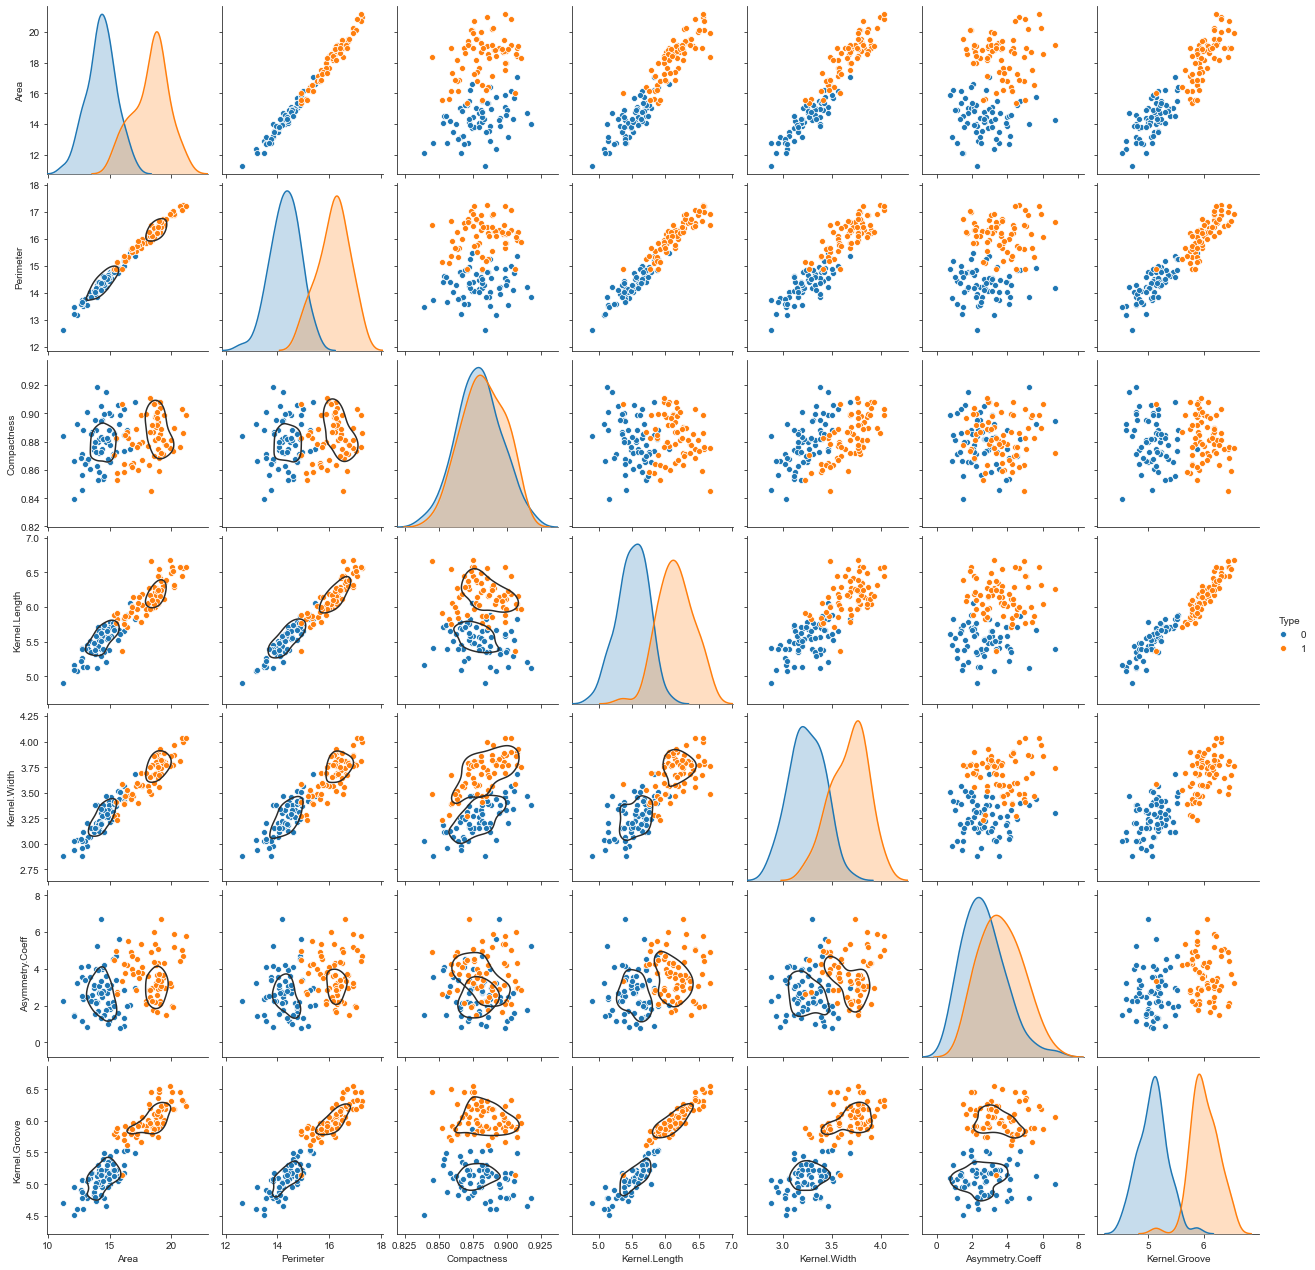

In [8]:
sns.set_style(style="ticks")
g=sns.pairplot(shuffled_dataset, "Type")
g.map_lower(sns.kdeplot, levels=1, color=".2")

In [9]:
x = shuffled_dataset.iloc[:, 0:-1].values
y = shuffled_dataset.iloc[:, -1].values

In [10]:
print("Input features\n", x[:10])
print("Label\n", y[:10])

Input features
 [[15.11   14.54    0.8986  5.579   3.462   3.128   5.18  ]
 [18.98   16.57    0.8687  6.449   3.552   2.144   6.453 ]
 [13.45   14.02    0.8604  5.516   3.065   3.531   5.097 ]
 [19.51   16.71    0.878   6.366   3.801   2.962   6.185 ]
 [15.01   14.76    0.8657  5.789   3.245   1.791   5.001 ]
 [20.97   17.25    0.8859  6.563   3.991   4.677   6.316 ]
 [18.81   16.29    0.8906  6.272   3.693   3.237   6.053 ]
 [16.16   15.33    0.8644  5.845   3.395   4.266   5.795 ]
 [14.38   14.21    0.8951  5.386   3.312   2.462   4.956 ]
 [15.03   14.77    0.8658  5.702   3.212   1.933   5.439 ]]
Label
 [0 1 0 1 0 1 1 1 0 0]


Note: StandardScaler() - moves  the mean and scaling to unit variance 
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [11]:
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

In [12]:
print("Input features\n", x[:10])
print("Label\n", y[:10])

Input features
 [[-0.53692161 -0.64777455  1.08427308 -0.6472563  -0.01530924 -0.04145555
  -0.72069465]
 [ 1.08359294  1.21567334 -0.80625676  1.50835401  0.30634492 -0.80861474
   1.66931926]
 [-1.23202605 -1.12511095 -1.33105267 -0.80335221 -1.43416148  0.27273668
  -0.87652431]
 [ 1.30552387  1.34418699 -0.21823243  1.30270384  1.19625476 -0.17087468
   1.16615843]
 [-0.57879537 -0.44582453 -0.99594203 -0.12693657 -0.79085316 -1.08382531
  -1.05676103]
 [ 1.91688078  1.83988248  0.28127211  1.7908133   1.87530243  1.16619648
   1.41210645]
 [ 1.01240754  0.95864604  0.5784457   1.06979881  0.81026977  0.04352449
   0.91833295]
 [-0.09724712  0.07740961 -1.07813898  0.01181536 -0.2547629   0.84576718
   0.43394679]
 [-0.84260007 -0.95069957  0.8629736  -1.1254549  -0.55139951 -0.56069134
  -1.14124698]
 [-0.57042062 -0.43664498 -0.98961919 -0.3424976  -0.90879302 -0.97311738
  -0.23443102]]
Label
 [0 1 0 1 0 1 1 1 0 0]


In [13]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.3)

In [14]:
print("X_train dataset \n", X_train.shape)
print("Y_train dataset \n", Y_train.shape)
print("X_test dataset \n", X_test.shape)
print("Y_test dataset \n", Y_test.shape)

X_train dataset 
 (93, 7)
Y_train dataset 
 (93,)
X_test dataset 
 (41, 7)
Y_test dataset 
 (41,)


In [15]:
# Reshaping matrix dimension
Y_train = Y_train.reshape(Y_train.shape[0], 1)
Y_test = Y_test.reshape(Y_test.shape[0], 1)
X_train = X_train.T
Y_train = Y_train.T
X_test = X_test.T
Y_test = Y_test.T

In [16]:
#This is the expected input matrix shape/dimension
print("X_train dataset: after transposition", X_train.shape)
print("Y_train dataset: after transposition", Y_train.shape)
print("X_test dataset: after transposition", X_test.shape)
print("Y_test dataset: after transposition", Y_test.shape)

X_train dataset: after transposition (7, 93)
Y_train dataset: after transposition (1, 93)
X_test dataset: after transposition (7, 41)
Y_test dataset: after transposition (1, 41)


### Neural Network Functions

In [17]:
def initialize_parameters_zeros(dim):
    n_features = dim
    n_out = 1
    params = { "W": np.zeros((n_out, n_features)),
           "b": np.zeros((n_out, 1)) }
    return params

def sigmoid(Z, derivative=False):
    if derivative:
        sig = 1 / (1 + np.exp(-Z))
        return sig*(1-sig)
    return 1 / (1 + np.exp(-Z))                            

def feed_forward(X, params):
    cache = {}
    cache["Z"] = np.dot(params["W"], X) + params["b"]
    cache["A"] = sigmoid(cache["Z"], False)
    return cache

def back_propagate(X, Y, cache):
    m = X.shape[1]
    P=cache["A"]
    ## Simplified
    dZ = (1/m) * (P-Y)
    dW = np.dot(dZ, X.T)
    db = np.sum(dZ, axis=1, keepdims=True)
    return {"dW": dW, "db": db}

def update_parameters(params, grads, learning_rate):
    W = params["W"] - learning_rate * grads["dW"]
    b = params["b"] - learning_rate * grads["db"]
    return {"W": W, "b": b}

def BinaryCrossEntropy(Y, P):
    m = Y.shape[1]
    cost =  (1 / m) * np.sum(np.multiply(-Y, np.log(P)) 
                             - np.multiply(1 - Y, np.log(1 - P)))
    return cost


### Neural Network Model Setup

![](imgs/2in_1_layer_NN_1.png)

In [48]:
# Parameters initialization
params = initialize_parameters_zeros(X_train.shape[0])

In [49]:
# parameters' shape
print("W shape", params['W'].shape)
print("b shape", params['b'].shape)

W shape (1, 7)
b shape (1, 1)


In [50]:
# parameters' initialised randomly
params

{'W': array([[0., 0., 0., 0., 0., 0., 0.]]), 'b': array([[0.]])}

### Hyper-parameters configuration and neural network training

In [51]:
# Hyper-parameters
learning_rate = 0.05
number_of_epoch=100
m_batch = X_train.shape[1]

# Initially empty list, this will store all the training cost values
costs = []

# Start training
for epoch in range(number_of_epoch):
    
    cache = feed_forward(X_train, params)
    grads = back_propagate(X_train, Y_train, cache)
    params = update_parameters(params, grads, learning_rate)

    cost = BinaryCrossEntropy(Y_train, cache["A"])
    
    if (epoch % 1) == 0 or epoch == number_of_epoch - 1:
        print("Cost at epoch#{}: {:.5f}".format(epoch, cost))
        costs.append(cost)  
    

Cost at epoch#0: 0.69315
Cost at epoch#1: 0.65303
Cost at epoch#2: 0.61749
Cost at epoch#3: 0.58597
Cost at epoch#4: 0.55794
Cost at epoch#5: 0.53294
Cost at epoch#6: 0.51057
Cost at epoch#7: 0.49047
Cost at epoch#8: 0.47234
Cost at epoch#9: 0.45593
Cost at epoch#10: 0.44102
Cost at epoch#11: 0.42743
Cost at epoch#12: 0.41498
Cost at epoch#13: 0.40356
Cost at epoch#14: 0.39303
Cost at epoch#15: 0.38330
Cost at epoch#16: 0.37428
Cost at epoch#17: 0.36590
Cost at epoch#18: 0.35810
Cost at epoch#19: 0.35080
Cost at epoch#20: 0.34397
Cost at epoch#21: 0.33757
Cost at epoch#22: 0.33154
Cost at epoch#23: 0.32587
Cost at epoch#24: 0.32051
Cost at epoch#25: 0.31545
Cost at epoch#26: 0.31065
Cost at epoch#27: 0.30610
Cost at epoch#28: 0.30178
Cost at epoch#29: 0.29767
Cost at epoch#30: 0.29375
Cost at epoch#31: 0.29002
Cost at epoch#32: 0.28645
Cost at epoch#33: 0.28304
Cost at epoch#34: 0.27977
Cost at epoch#35: 0.27665
Cost at epoch#36: 0.27365
Cost at epoch#37: 0.27076
Cost at epoch#38: 0.26

### Neural network prediction performance evaluation

#### Plot Learning Curve

In [52]:
def plot_learning_curve(costs, learning_rate, total_epochs, save=False):
    
    # plot the cost
    plt.figure()
    #plt.style.use("fivethirtyeight")
    plt.style.use('seaborn-whitegrid')
    
    # the steps at with costs were recorded
    steps = int(total_epochs / len(costs))  
    plt.ylabel('Cost')
    plt.xlabel('Iterations ')
    plt.title("Learning rate =" + str(learning_rate))
    plt.plot(np.squeeze(costs))
    locs, labels = plt.xticks()
    # change x labels of the plot
    plt.xticks(locs[1:-1], tuple(np.array(locs[1:-1], dtype='int')*steps))  
    plt.xticks()
    if save:
        plt.savefig('Cost_Curve.png', bbox_inches='tight')
    plt.show()

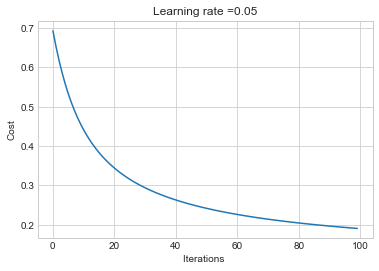

In [53]:
plot_learning_curve(costs, learning_rate, 
                    number_of_epoch, save=True)

#### Calculate Model's Accuracy

In [54]:
def predict(data_in, label_in, params, threshold):
    m = data_in.shape[1]
    predict = np.zeros((1,m))
    cache = feed_forward(data_in, params)
    probs=cache["A"]
    prediction = (probs >= threshold) * 1.0
    accuracy = np.mean(prediction == label_in) * 100
    return probs, prediction, accuracy

In [55]:
classifcation_thresh = 0.5

probs, predictions, accuracy = predict(X_test, Y_test, params, classifcation_thresh)

print("The predicted outputs of 4 examples: \n{}".format(predictions[:,:4]))
print("The predicted prbabilities of 4 examples:\n {}".format(np.round(probs[:, :4], decimals=3)))
print("\nThe accuracy of the model is: {:.2f}%".format(accuracy))

The predicted outputs of 4 examples: 
[[0. 1. 0. 1.]]
The predicted prbabilities of 4 examples:
 [[0.055 0.943 0.043 0.919]]

The accuracy of the model is: 100.00%
